In [43]:
import matplotlib.pyplot as plt
import numpy as np
import pomegranate as pom
import pickle

In [44]:
import import_ipynb
import readSequenceFunctions as rsf

In [45]:
np.set_printoptions(precision=8, linewidth=100, suppress=True)

## Training and test dataset

In [46]:
seqDict,seqDictT,trainList,trainNamesList,testList,testNamesList=rsf.traindAndTestDataset(rsf.pathsBCE)

## Creating models

In [47]:
def distr3SC1():
    d0=pom.DiscreteDistribution({0:0.68, 1:0.23, 2:0.09, 3:0})
    d1=pom.DiscreteDistribution({0:0.73, 1:0.20, 2:0.07, 3:0})
    d2=pom.DiscreteDistribution({0:0.68, 1:0.23, 2:0.09, 3:0})
    d3=pom.DiscreteDistribution({0:0, 1:0, 2:0, 3:1})
    distributionList3S=[d0,d1,d2,d3]
    return distributionList3S

In [48]:
def createFullModel():
    distrList=distr3SC1()
    
    matrix=np.array([[1,1,1,1],
                     [1,1,1,1],
                     [1,1,1,1],
                     [0,0,0,0]])
    start=np.array([1,1,1,0])
    end=np.array([0,0,0,1])
    
    return pom.HiddenMarkovModel.from_matrix(matrix, distrList, start,end)

In [53]:
model=createFullModel()

In [54]:
model.dense_transition_matrix()

array([[0.25      , 0.25      , 0.25      , 0.25      , 0.        , 0.        ],
       [0.25      , 0.25      , 0.25      , 0.25      , 0.        , 0.        ],
       [0.25      , 0.25      , 0.25      , 0.25      , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        , 1.        ],
       [0.33333333, 0.33333333, 0.33333333, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        , 0.        ]])

In [55]:
val=model.fit(trainList, verbose=True, stop_threshold=1,return_history=True)

[1] Improvement: 497134.7616782258	Time (s): 5.991
[2] Improvement: 6.87424311065115	Time (s): 5.902
[3] Improvement: 7.042128520319238	Time (s): 5.889
[4] Improvement: 7.232230379944667	Time (s): 5.922
[5] Improvement: 7.4450065600685775	Time (s): 5.897
[6] Improvement: 7.680716298054904	Time (s): 5.985
[7] Improvement: 7.9393886604812	Time (s): 5.887
[8] Improvement: 8.220790437888354	Time (s): 5.882
[9] Improvement: 8.524393131025136	Time (s): 5.888
[10] Improvement: 8.849341465625912	Time (s): 5.916
[11] Improvement: 9.194423533044755	Time (s): 5.899
[12] Improvement: 9.558045097161084	Time (s): 5.982
[13] Improvement: 9.938209309708327	Time (s): 5.886
[14] Improvement: 10.332504270598292	Time (s): 5.916
[15] Improvement: 10.73810037993826	Time (s): 5.913
[16] Improvement: 11.151759799802676	Time (s): 5.888
[17] Improvement: 11.5698595745489	Time (s): 5.973
[18] Improvement: 11.988430643687025	Time (s): 5.898
[19] Improvement: 12.403212644625455	Time (s): 5.89
[20] Improvement: 12.

[157] Improvement: 2.6112238480709493	Time (s): 5.943
[158] Improvement: 2.5805612495169044	Time (s): 5.843
[159] Improvement: 2.550255961017683	Time (s): 5.853
[160] Improvement: 2.520303015364334	Time (s): 5.925
[161] Improvement: 2.490697399713099	Time (s): 5.875
[162] Improvement: 2.4614343324210495	Time (s): 5.944
[163] Improvement: 2.4325091307982802	Time (s): 5.855
[164] Improvement: 2.403917230432853	Time (s): 5.909
[165] Improvement: 2.375654202187434	Time (s): 5.842
[166] Improvement: 2.3477157093584538	Time (s): 5.863
[167] Improvement: 2.3200975058134645	Time (s): 5.849
[168] Improvement: 2.29279556684196	Time (s): 5.934
[169] Improvement: 2.265805799048394	Time (s): 5.867
[170] Improvement: 2.2391243709716946	Time (s): 5.83
[171] Improvement: 2.212747457670048	Time (s): 5.881
[172] Improvement: 2.1866713750641793	Time (s): 5.896
[173] Improvement: 2.16089250263758	Time (s): 5.886
[174] Improvement: 2.135407301597297	Time (s): 5.958
[175] Improvement: 2.1102123868186027	Tim

In [56]:
with open("../Pickle/model3S-full-c1.store","wb") as file:
    pickle.dump(model,file)

In [57]:
model.dense_transition_matrix()

array([[0.34509336, 0.30493608, 0.34509336, 0.00487719, 0.        , 0.        ],
       [0.33601503, 0.32793591, 0.33601503, 0.00003403, 0.        , 0.        ],
       [0.34509336, 0.30493608, 0.34509336, 0.00487719, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        , 0.        ]])

In [58]:
wyn=model.fit(trainList, verbose=True, stop_threshold=1,return_history=True, algorithm='viterbi')

[1] Improvement: -14898.444698268315	Time (s): 3.789
Total Training Improvement: -14898.444698268315
Total Training Time (s): 8.2644


In [59]:
model.dense_transition_matrix()

array([[0.38502236, 0.60620411, 0.        , 0.00877353, 0.        , 0.        ],
       [0.37967005, 0.62032995, 0.        , 0.        , 0.        , 0.        ],
       [0.34509336, 0.30493608, 0.34509336, 0.00487719, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        , 0.        ]])

In [60]:
val=model.fit(trainList, verbose=True, stop_threshold=1,return_history=True)

[1] Improvement: 2508.119374120375	Time (s): 4.196
[2] Improvement: 1449.5929185594432	Time (s): 4.269
[3] Improvement: 1016.45457090321	Time (s): 4.317
[4] Improvement: 779.2994218575768	Time (s): 4.286
[5] Improvement: 629.4353162450716	Time (s): 4.179
[6] Improvement: 526.13083379413	Time (s): 4.364
[7] Improvement: 450.6149464105256	Time (s): 4.458
[8] Improvement: 393.020464344183	Time (s): 4.461
[9] Improvement: 347.6602023362648	Time (s): 4.304
[10] Improvement: 311.0240533379838	Time (s): 4.138
[11] Improvement: 280.8276763432659	Time (s): 4.127
[12] Improvement: 255.5201630005613	Time (s): 4.128
[13] Improvement: 234.01145353284664	Time (s): 4.204
[14] Improvement: 215.51295380620286	Time (s): 4.126
[15] Improvement: 199.4400395078119	Time (s): 4.103
[16] Improvement: 185.350108548766	Time (s): 4.115
[17] Improvement: 172.9019227696117	Time (s): 4.105
[18] Improvement: 161.82816315395758	Time (s): 4.197
[19] Improvement: 151.91644560173154	Time (s): 4.107
[20] Improvement: 142

[157] Improvement: 5.473772367229685	Time (s): 4.232
[158] Improvement: 5.39600854809396	Time (s): 4.168
[159] Improvement: 5.319635608699173	Time (s): 4.116
[160] Improvement: 5.244623509468511	Time (s): 4.129
[161] Improvement: 5.170942957047373	Time (s): 4.165
[162] Improvement: 5.098565379157662	Time (s): 4.168
[163] Improvement: 5.027463054750115	Time (s): 4.498
[164] Improvement: 4.957608901662752	Time (s): 4.149
[165] Improvement: 4.888976482441649	Time (s): 4.125
[166] Improvement: 4.821540161734447	Time (s): 4.121
[167] Improvement: 4.755274873692542	Time (s): 4.211
[168] Improvement: 4.690156155498698	Time (s): 4.217
[169] Improvement: 4.626160223502666	Time (s): 4.253
[170] Improvement: 4.5632638656534255	Time (s): 4.158
[171] Improvement: 4.5014444252010435	Time (s): 4.151
[172] Improvement: 4.440679843537509	Time (s): 4.13
[173] Improvement: 4.38094856031239	Time (s): 4.119
[174] Improvement: 4.32222955301404	Time (s): 4.196
[175] Improvement: 4.264502395642921	Time (s): 4

[311] Improvement: 0.9939092751592398	Time (s): 4.138
Total Training Improvement: 14786.90204784507
Total Training Time (s): 1331.7980


In [61]:
model.dense_transition_matrix()

array([[0.54995655, 0.44392132, 0.        , 0.00612213, 0.        , 0.        ],
       [0.54348808, 0.45651192, 0.        , 0.        , 0.        , 0.        ],
       [0.34509336, 0.30493608, 0.34509336, 0.00487719, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        , 0.        ]])

## Grupowanie

In [100]:
import sequenceProcesing as sp
from sklearn.cluster import DBSCAN, KMeans
from sklearn.manifold import TSNE

In [123]:
results=[]
for name in seqDict:
    if name not in trainNamesList:
        continue
    seqTyp=seqDictT[name]
    seqStr=seqDict[name]
    r,l=sp.calculateF(model, seqStr,seqTyp, path_alg="viterbi",return_lengths=True,coding=1)
    results.append(r+l)
results=np.array(results)

In [124]:
results=results.T

In [68]:
results

array([[1.21323748, 1.22524657, 1.08759125, ..., 1.46960734, 1.13141158, 1.11896235],
       [1.05174209, 1.1201782 , 1.05949762, ..., 1.10772387, 1.09694897, 1.05800148],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        , 0.        ],
       [0.33684211, 0.30701754, 0.41935484, ..., 0.25333333, 0.25641026, 0.34229829],
       [0.66315789, 0.69298246, 0.58064516, ..., 0.74666667, 0.74358974, 0.65770171],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        , 0.        ]])

In [81]:
wynikDbscan=DBSCAN(eps=0.05, min_samples=10).fit_predict(results.T)

In [84]:
tsne=TSNE()
tsneWynik=tsne.fit_transform(results.T).T

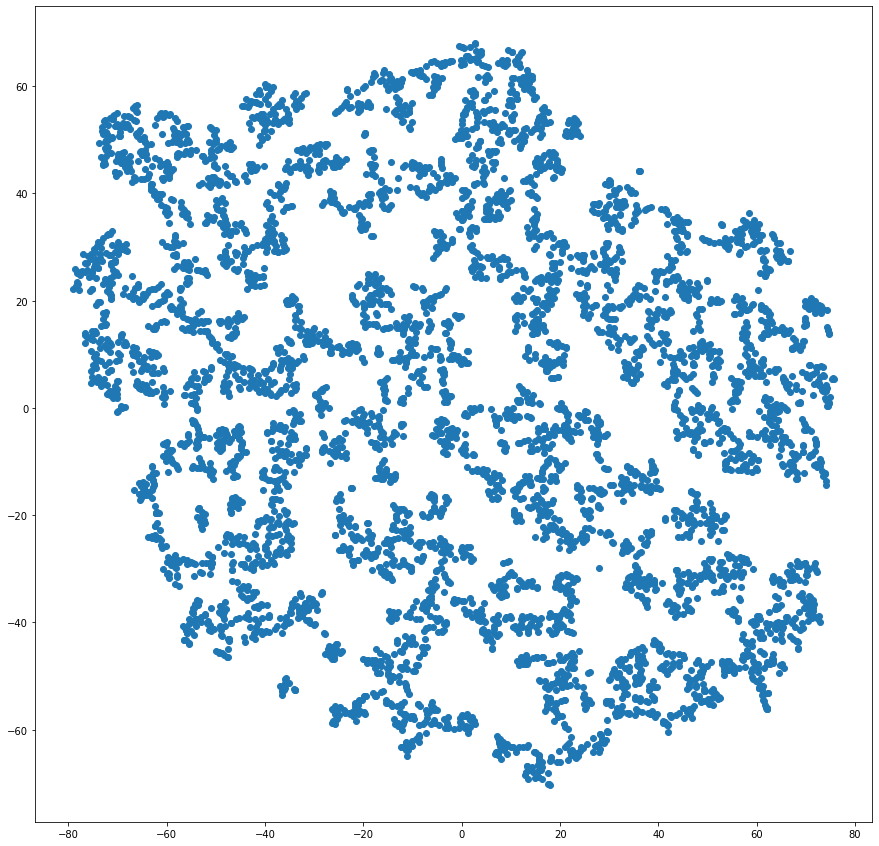

In [85]:
plt.gcf().set_size_inches(15,15)
plt.scatter(tsneWynik[0],tsneWynik[1])

## Grupowanie pełen model

In [86]:
with open("../Pickle/model3S-full-c1.store","rb") as file:
    model=pickle.load(file)

In [87]:
results=[]
for name in seqDict:
    seqTyp=seqDictT[name]
    seqStr=seqDict[name]
    r,l=sp.calculateF(model, seqStr,seqTyp, path_alg="viterbi",return_lengths=True,coding=1)
    results.append(r+l)
results=np.array(results)

In [88]:
results=results.T

In [89]:
tsne=TSNE()
tsneWynik=tsne.fit_transform(results.T).T

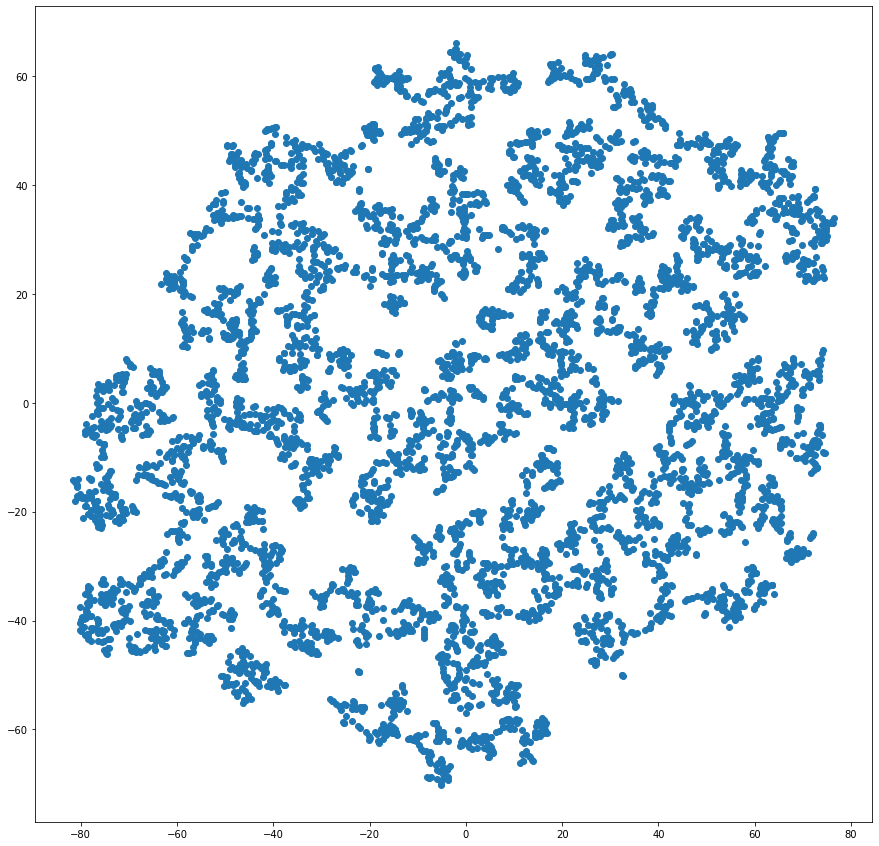

In [90]:
plt.gcf().set_size_inches(15,15)
plt.scatter(tsneWynik[0],tsneWynik[1])

In [98]:
wynikDbscan=DBSCAN(eps=0.02, min_samples=5).fit_predict(results.T)

In [99]:
np.unique(wynikDbscan, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
        22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
        45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55]),
 array([1899, 3646,   18,    9,    5,   12,    8,    5,    6,    7,    9,    5,   16,    6,    5,
           6,    5,   20,    7,    8,   13,    9,    6,   12,    8,   11,    5,    6,    5,    5,
           4,   10,   13,    5,    8,    5,    5,    7,    5,    5,    3,    8,    5,    8,    5,
           4,    9,    5,    4,    4,    4,    3,    3,    4,    3,    6,    5]))

## Kmeans

In [126]:
kmeans=KMeans(n_clusters=3)
wynik=kmeans.fit_predict(results.T)

In [127]:
np.unique(wynik, return_counts=True)

(array([0, 1, 2], dtype=int32), array([3319, 2163,  400]))

In [109]:
a=model

In [111]:
m1=model

In [128]:
X=np.array(trainList)

In [129]:
wyn=m1.fit(X[wynik==0], verbose=True, stop_threshold=1,return_history=True, algorithm='viterbi')

[1] Improvement: -9027.23022085987	Time (s): 2.52
Total Training Improvement: -9027.23022085987
Total Training Time (s): 5.5414


In [130]:
m1.dense_transition_matrix()

array([[0.38812374, 0.60488242, 0.        , 0.00699385, 0.        , 0.        ],
       [0.38383152, 0.61616848, 0.        , 0.        , 0.        , 0.        ],
       [0.34509336, 0.30493608, 0.34509336, 0.00487719, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        , 0.        ]])

In [133]:
with open("../Pickle/model3S-full-c1.store","rb") as file:
    m2=pickle.load(file)

In [134]:
wyn=m2.fit(X[wynik==1], verbose=True, stop_threshold=1,return_history=True, algorithm='viterbi')

[1] Improvement: -4688.623874944693	Time (s): 1.053
Total Training Improvement: -4688.623874944693
Total Training Time (s): 2.2921


In [137]:
m2.dense_transition_matrix()

array([[0.37837973, 0.60959913, 0.        , 0.01202114, 0.        , 0.        ],
       [0.37048814, 0.62951186, 0.        , 0.        , 0.        , 0.        ],
       [0.34509336, 0.30493608, 0.34509336, 0.00487719, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        , 0.        ]])

In [135]:
with open("../Pickle/model3S-full-c1.store","rb") as file:
    m3=pickle.load(file)

In [136]:
wyn=m3.fit(X[wynik==2], verbose=True, stop_threshold=1,return_history=True, algorithm='viterbi')

[1] Improvement: -462.7288212578933	Time (s): 0.1046
Total Training Improvement: -462.7288212578933
Total Training Time (s): 0.2328


In [138]:
m3.dense_transition_matrix()

array([[0.3676646 , 0.60723028, 0.        , 0.02510513, 0.        , 0.        ],
       [0.36600429, 0.63399571, 0.        , 0.        , 0.        , 0.        ],
       [0.34509336, 0.30493608, 0.34509336, 0.00487719, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        , 0.        ]])